# 샘플 데이터 생성

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=400, n_features=2, n_classes=2,n_redundant=0,random_state=42)

In [4]:
print(x[1],y[1])

[-1.61159893 -0.41004596] 0


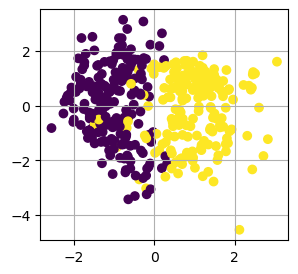

In [5]:
plt.figure(figsize=(3.2,3))
plt.scatter(x[:,0],x[:,1],c=y)
plt.grid(True)
plt.show()

# 상관분석

In [6]:
import seaborn as sns

In [37]:
xy = np.zeros(shape=(400,3))
xy[:,0] = x[:,0]
xy[:,1] = x[:,1]
xy[:,2] = y
xy[0]

array([0.8006456 , 1.14226238, 1.        ])

In [38]:
data = pd.DataFrame(xy, columns = ['x0','x1','y'])

In [39]:
data.to_csv('./data/data1.csv',index=False)

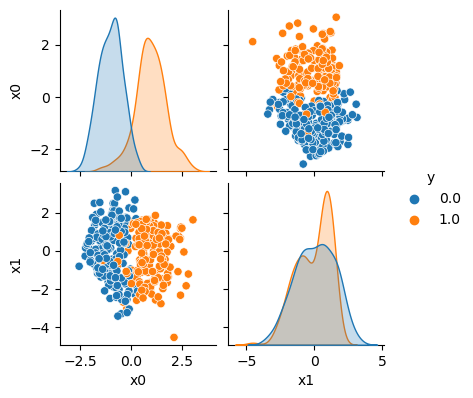

In [40]:
sns.pairplot(data,hue='y',height=2)
plt.show()

In [41]:
data.corr()

,x0,x1,y
x0,1.000000,-0.041727,0.824729
x1,-0.041727,1.000000,-0.043751
y,0.824729,-0.043751,1.000000


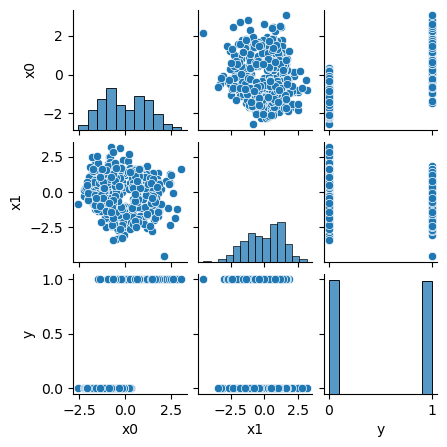

In [42]:
sns.pairplot(data,height=1.5)
plt.show()

# 분류값 예측

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### train데이터와 test데이터로 분리

In [44]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=42)

### 로지스틱 회귀모형 생성

In [45]:
model = LogisticRegression(random_state=42)

### 모형 학습

In [46]:
model.fit(train_x,train_y)

LogisticRegression(random_state=42)

### 분류값 예측

In [65]:
pred_y = model.predict(test_x)
print(pred_y)
print(len(pred_y))

[1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1]
100


In [48]:
print(test_y[:35])

[1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1]


In [49]:
model.intercept_ # 모델의 절편

array([0.46157838])

In [50]:
model.coef_[0] # x0,x1의 상관계수

array([ 3.24270776, -0.24075118])

> y = 0.46158 + 3.24271* *x0 - 24075* *x1 이 된다.

In [51]:
model.score(test_x,test_y) # 다중 분류에서 score()함수는 Accuracy를 반환한다.

0.94

In [67]:
pd.DataFrame(pred_y).to_csv("./data/pred_y.csv")

In [63]:
pd.DataFrame(test_x).to_csv('./data/testX.csv',index=False)

### Accuracy = ( TP + TN ) / ( TP + FP + FN + FP )

## 정오 분류표 ( Confusion matrix )

In [52]:
import sklearn.metrics

In [90]:
cm = sklearn.metrics.confusion_matrix(pred_y,test_y)
cm

array([[51,  0],
       [ 6, 43]], dtype=int64)

In [54]:
import seaborn as sn

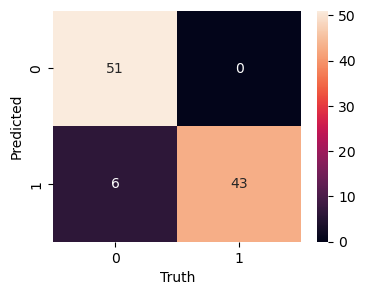

In [55]:
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot=True)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.show()

In [56]:
intercept = model.intercept_
odds_y = np.exp(intercept)

# 출력
print('y의 오즈:', odds_y)

y의 오즈: [1.58657623]


# 위 예제를 statsmodel을 사용하여 실행

In [73]:
import statsmodels.api as sm
train_x_ac = sm.add_constant(train_x)
test_x_ac = sm.add_constant(test_x)
logit_sm = sm.Logit(train_y,train_x_ac).fit()

Optimization terminated successfully.
         Current function value: 0.200107
         Iterations 8


In [74]:
y_pred = logit_sm.predict(test_x_ac)

In [76]:
y_pred[:3]

array([0.98317559, 0.04750625, 0.6537815 ])

### statsmodels.api 클래스의 Logit함수를 이용해 로지스틱 회귀모델을 구해서 predict() 하면 예측값이 0 또는 1로 나오지 않고 sigmoid변환값(실수값)으로 나온다.

### 따라서 이 값을 바로 confusion matrix로 바꿀 수 없고, 직접 0.5보다 큰지 작은지 판단해서 0과1로 바꾼 후에 sklearn.metrics.confusion_matrix()함수를 사용해야 한다

In [86]:
# cm = sklearn.metrics.confusion_matrix(y_pred,test_y) #[x] ValueError

In [85]:
list_yp=y_pred.tolist()
y_pred_n=np.array(list(map(lambda x : 1 if x>0.5 else 0,list_yp)))
y_pred_n

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [88]:
cm_n = sklearn.metrics.confusion_matrix(y_pred_n,test_y)
cm_n

array([[51,  0],
       [ 6, 43]], dtype=int64)

In [91]:
cm = sklearn.metrics.confusion_matrix(pred_y,test_y)
cm

array([[51,  0],
       [ 6, 43]], dtype=int64)